# Predicting invoice Fraud using Machine Learning 

In this problem we are tryig to predict the possibility of fraud in an invoice from a set of features 

Wer'e going to take the following appraoch

1) Problem definition
2) data
3) evaluation
4) Features
5) Modelling
6) Experimentation


1. Problem Definition
in a statement :

Given data from an invoice can we predict possibility of fraud in that.

2. Data
The original data caame from different customers that we have signed up on our home grown system.

3. Evaluation
It needs to be very accurate, the PoC should reach 95% or higher accuracy

4. Features
Data dictionary 


In [3]:
## preparing our tools 
## We are going to use pandas, numpy, matplotlib for data analysis and manipulation 
#data analysis and manipulation 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Models from scikit learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

#Model Evaluation 
from sklearn. model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import plot_roc_curve 

## Load data

In [9]:
df = pd.read_csv("data\InvoiceData.csv",encoding='unicode_escape')
df.shape

(922, 23)

#### So we see that our dataset has 922 rows and 23 columns 

### Data Exploration ( exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset

* What questions are you trying to solve
* what kind of data do you have and how do we trat different types
* What's missing from the data and how do you deal with it
* Where are the outliers and why should you care about them
* How can you add, change or remove features to get more out of our data

In [11]:
# Lets find out how many of each class is there 
df["Status"].value_counts()

2    624
1    179
7     83
3     34
4      2
Name: Status, dtype: int64

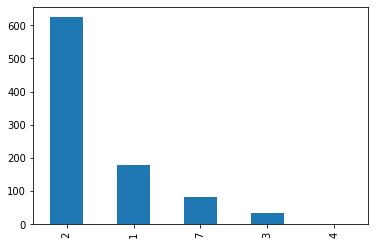

In [12]:
df["Status"].value_counts().plot(kind="bar");

#### we notice that this is not a symmetrical dataset and is dominated by class 2, most fraud sets are not symmetrical 

In [15]:
# are there any missing values 
df.isna().sum()

InvoiceNumber          15
InvoiceDate             0
InvoiceDueDate        499
SupplierName           25
SupplierAddress       623
BuyerName             574
AccountNumber         232
BankName              374
SortCode              647
SwiftCode             745
IBAN                  810
NetTotal                0
VATTotal                0
DeliveryCharge          0
TotalAmount             1
Currency                2
SupplierAddress1      405
SupplierCity          126
SupplierPostalCode    203
GSTTotal                0
TaxNumber             651
TaxTotal                0
Status                  0
dtype: int64

### Taking a closer look at the dataset 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   InvoiceNumber       907 non-null    object 
 1   InvoiceDate         922 non-null    object 
 2   InvoiceDueDate      423 non-null    object 
 3   SupplierName        897 non-null    object 
 4   SupplierAddress     299 non-null    object 
 5   BuyerName           348 non-null    object 
 6   AccountNumber       690 non-null    object 
 7   BankName            548 non-null    object 
 8   SortCode            275 non-null    object 
 9   SwiftCode           177 non-null    object 
 10  IBAN                112 non-null    object 
 11  NetTotal            922 non-null    float64
 12  VATTotal            922 non-null    float64
 13  DeliveryCharge      922 non-null    float64
 14  TotalAmount         921 non-null    float64
 15  Currency            920 non-null    object 
 16  Supplier

In [17]:
#More information about the float datatype 
df.describe()

,NetTotal,VATTotal,DeliveryCharge,TotalAmount,GSTTotal,TaxTotal,Status
count,9.220000e+02,9.220000e+02,922.000000,9.210000e+02,922.000000,922.000000,922.000000
mean,1.866101e+05,3.953171e+04,342.308026,2.611535e+05,166.301811,1884.468200,2.297180
std,1.366281e+06,2.743276e+05,7786.824866,1.657849e+06,1229.938808,19751.526594,1.550655
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,2.000000e+02,0.000000e+00,0.000000,2.942500e+02,0.000000,0.000000,2.000000
50%,1.250000e+03,0.000000e+00,0.000000,1.500000e+03,0.000000,0.000000,2.000000
75%,5.000000e+03,2.500000e+02,0.000000,8.883330e+03,0.000000,9.080000,2.000000
max,2.000900e+07,4.001800e+06,214365.000000,2.401080e+07,17500.000000,232600.000000,7.000000
